### Process datafiles, 05.11


In [188]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [151]:
import numpy as np
#import cv2
framerate = 29.18
from scipy import signal
from scipy.signal import argrelextrema

import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_widths
#%cd "D:\Interfacial Waves resonance videos 0430"
framerate = 29.18

Old resonance stuff, again:

In [127]:
def filterOnce(original):
    filtered = original.copy()
    avg = np.average(original)
    std = np.std(original)

    divs = np.abs(original-avg)> 2.5*std
    index = np.arange(0, len(original), 1)
    filtered[index[divs]] = filtered[index[divs]-1]
    #print(np.sum(divs))
    return filtered

def filterUntilSmooth(original):
    filtered = original.copy()
    avg = np.average(original)
    std = np.std(original)
    div = np.abs(original-avg) > 2.5*std
    while(np.sum(div)>0):
        filtered = filterOnce(filtered)
        avg = np.average(filtered)
        std = np.std(filtered)
        div = np.abs(filtered-avg)>2.5*std
    return filtered

def normalize(timeseries):
    avg = np.average(timeseries)
    stdev = np.std(np.abs(timeseries))
    return (timeseries-avg)/stdev


def lin(x, a,b):
    return x*a+b

def drawLine(position, height, width, ax):
    left = [position-width/2.,position + width/2.]
    right = [height,height]
    ax.plot(left, right, '-', c='Crimson', linewidth=2.)
    
def getMaxFourierComponent(x, diag=None, ax = None):## 2 dimensional data, 1st col is time
    dt = x[:,0][1] - x[:,0][0]
    np_fft = np.fft.fft(x[:,1]-np.average(x[:,1]))
    n_samples = len(x)
    T = dt*n_samples
    df = 1./T
    amplitudes = 2./n_samples * np.abs(np_fft) 
    frequencies = np.fft.fftfreq(n_samples) * n_samples*df
    peaks, _ = find_peaks(amplitudes[:len(np_fft)//2], height = np.max(amplitudes)/2.)
    results_half = peak_widths(amplitudes[:len(np_fft)//2], peaks, rel_height=0.5)
    if(diag):
        ax.plot(frequencies[:len(frequencies)//2], amplitudes[:len(np_fft)//2], '-o')
        ax.plot(frequencies[:len(frequencies)//2][peaks], amplitudes[:len(np_fft)//2][peaks], "x", c='black', markersize=10)
        ax.set_xlim(0.05, 0.35)
        ax.set_title(diag)
        drawLine(frequencies[:len(frequencies)//2][peaks[0]], amplitudes[:len(frequencies)//2][peaks[0]]/2., results_half[0][0]*df, ax)
        ax.text(0.05, 0.7*np.max(amplitudes), r"Max Amplitude at %s Hz, Width = %s Hz" %(round(frequencies[:len(frequencies)//2][peaks[0]],3), round(results_half[0][0]*df,3)))
    return [frequencies[:len(frequencies)//2][peaks[0]], results_half[0][0]*df]


### read measurements with const driving:

In [81]:
freqsold = []
amplold = []
iwold = []
err = []
for e in FixvoltageOldTEST.values():
    freqsold.append(e['freq'])
    amplold.append(e['interfacePos'])
    iwold.append(e['interfaceWidth'])
    err.append(e['error'])

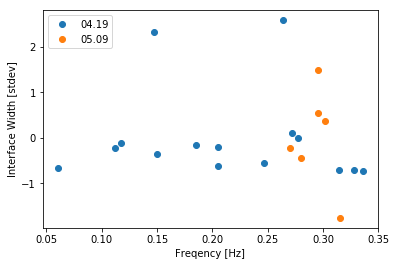

In [53]:
plt.plot(freqsold, normalize(iwold), 'o', label='04.19')
plt.plot(freqs,normalize(iw), 'o', label='05.09')
plt.xlabel('Freqency [Hz]')
plt.ylabel('Interface Width [stdev]')
plt.legend(loc='upper left')
plt.savefig('iwdth_frozen.png', bbox_inches='tight')


# Frequency of the driving

Maximal frequency component of the driving's FT.

Error ~ width at half max of the peak

### Measuremens of 04.19

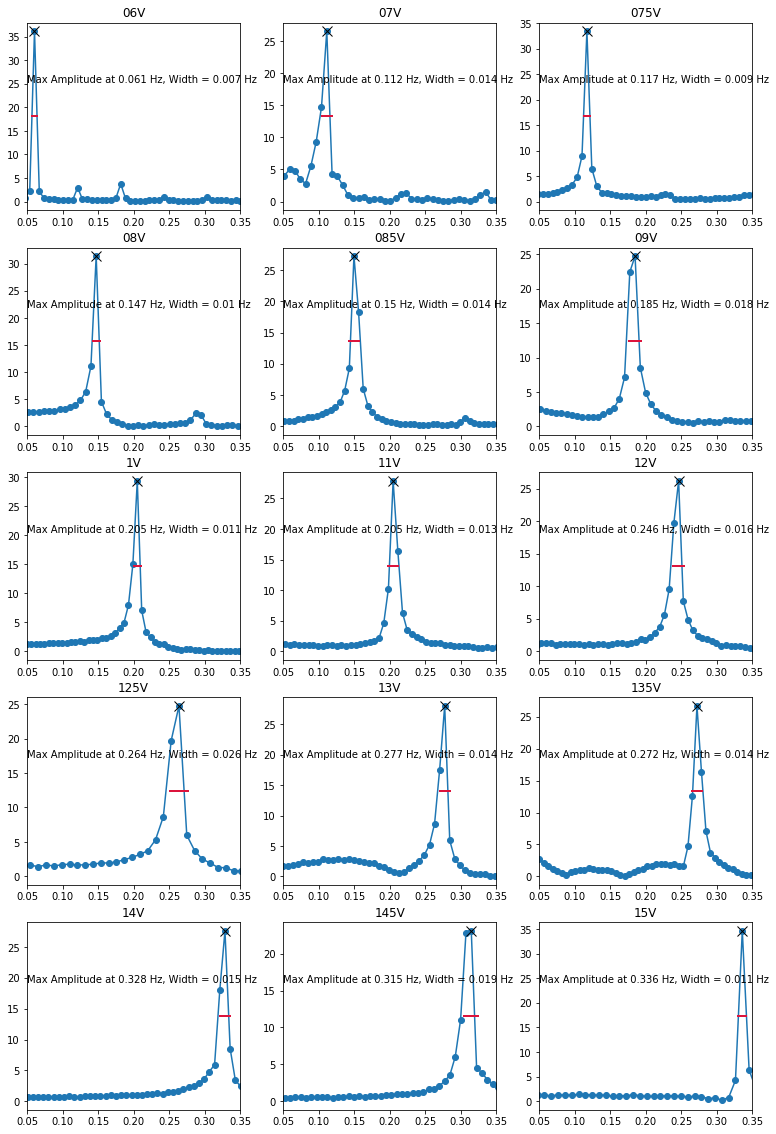

In [168]:
noRampVids = ['06V', '07V', '075V', '08V', '085V', '09V', '1V' , '11V', '12V', '125V', '13V', '135V', '14V', '145V', '15V']

FixvoltageOld = {}

voltages = [0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 1., 1.1, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5]
## diagnostics:
f, axes = plt.subplots(5, 3, figsize=(13,20))
axeslist = axes.flatten()
for i,e in enumerate(noRampVids):
    dictionary = {}
    driving = np.loadtxt('C:/Users/balin/Docs/boSchlieren/data0419/timeseries/driving/%s' %e, skiprows=2)
    surface = np.loadtxt('C:/Users/balin/Docs/boSchlieren/data0419/timeseries/surfaceresponse/%s' %e, skiprows=2)
    dictionary['surface'] = surface
    fr, err = getMaxFourierComponent(driving, diag = e, ax = axeslist[i])
    dictionary['freq'] = fr
    dictionary['error'] = err
    dictionary['voltage'] = voltages[i]
    FixvoltageOld[e] = {}
    FixvoltageOld[e]['driving']  = dictionary

    

### Measurements of 05.09

<Figure size 432x288 with 0 Axes>

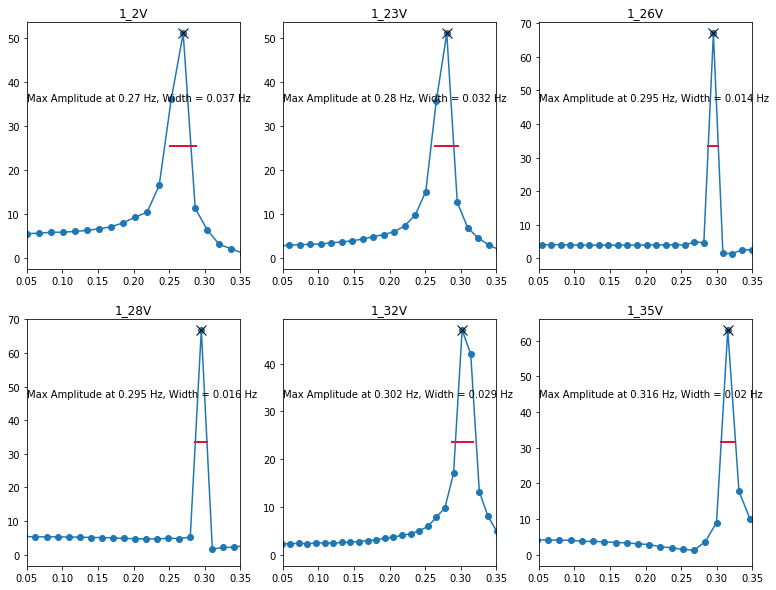

In [171]:
Fixvoltage = {}

voltages = [1.2, 1.23, 1.26, 1.28, 1.32, 1.35]
videos = ['1_2V', '1_23V', '1_26V', '1_28V', '1_32V', '1_35V']
## diagnostics:
plt.clf()
f, axes = plt.subplots(2, 3, figsize=(13,10))
axeslist = axes.flatten()
for i,e in enumerate(videos):
    dictionary = {}
    driving = np.loadtxt('C:/Users/balin/Docs/boSchlieren/data0509/2/driving/%s' %e, skiprows=2)
    surface = np.loadtxt('C:/Users/balin/Docs/boSchlieren/data0509/2/surface/%s' %e, skiprows=2)
    dictionary['surface'] = surface
    fr, err = getMaxFourierComponent(driving, diag = e, ax = axeslist[i])
    dictionary['freq'] = fr
    dictionary['error'] = err
    dictionary['voltage'] = voltages[i]
    Fixvoltage[e] = {}
    Fixvoltage[e]['driving']  = dictionary

    

### Voltage - Frequency relation

0.036804228994425654


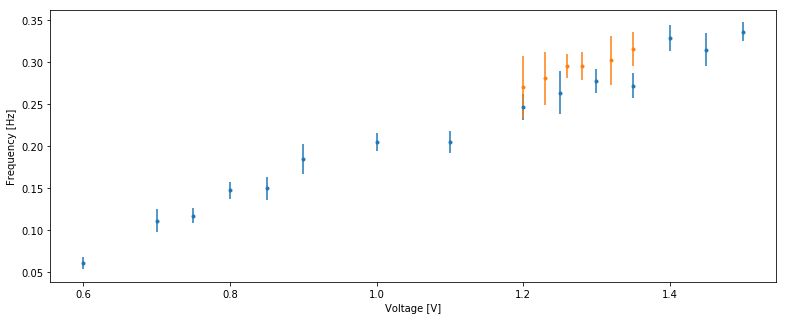

In [186]:
volt1 = []
freqs1 = []
err1 =[]
volt2 = []
freqs2 = []
err2 =[]

for e in FixvoltageOld.values():
    volt1.append(e['driving']['voltage'])
    freqs1.append(e['driving']['freq'])
    err1.append(e['driving']['error'])
for e in Fixvoltage.values():
    volt2.append(e['driving']['voltage'])
    freqs2.append(e['driving']['freq'])
    err2.append(e['driving']['error'])

plt.figure(figsize=(13, 5))
plt.errorbar(volt1, freqs1, fmt = '.', yerr=err1, label='04.19')
plt.errorbar(volt2, freqs2, fmt = '.', yerr=err2, label='05.09')
plt.xlabel('Voltage [V]')
plt.ylabel('Frequency [Hz]')

print(np.max(err2))

# Interface displacement and width

- Discard fist 20 seconds
- Interface position is the standard deviation
- Interface width is the mean
- errors: 40 sec moving average, max - min

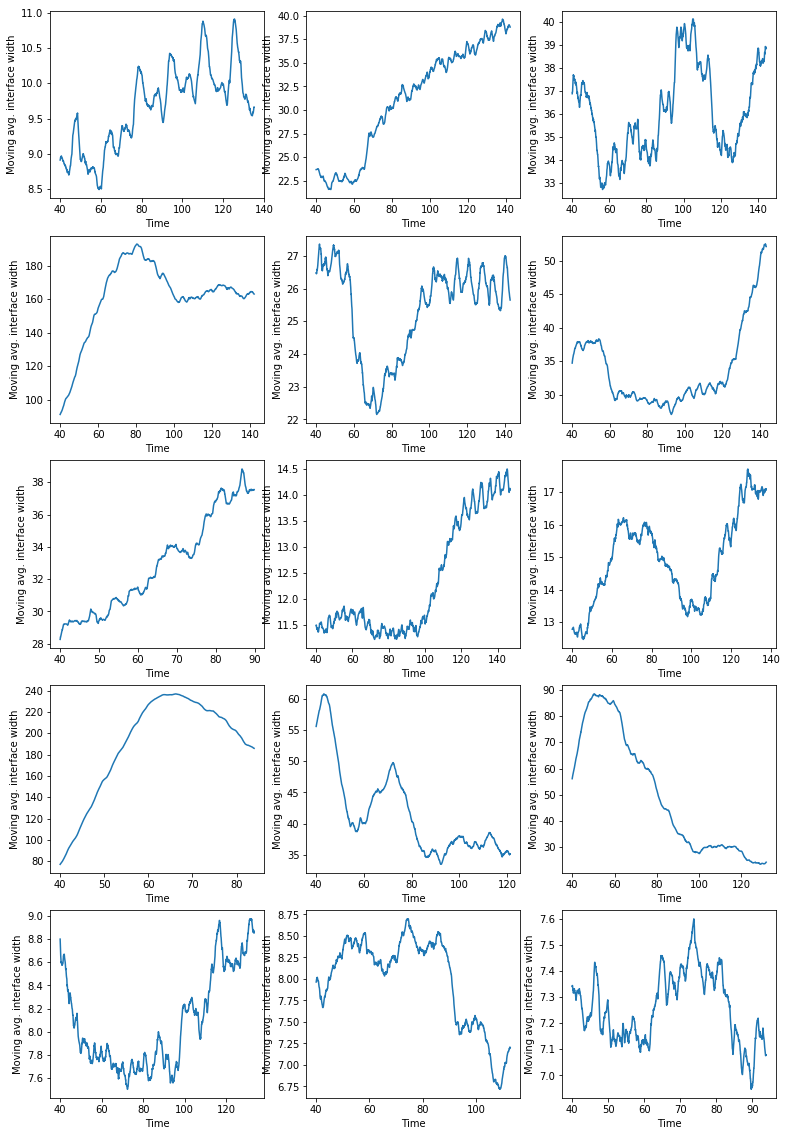

In [169]:
f, axes = plt.subplots(5, 3, figsize=(13,20))
axeslist = axes.flatten()

for i,e in enumerate(noRampVids):
    dictionary= {}
    data = np.loadtxt('C:/Users/balin/Docs/boSchlieren/data0419/measured/%s.txt' %e)
    dictionary['interfacePosRaw'] = data[:,0]
    dictionary['interfaceWidthRaw'] = data[:,1]
    transient = int(20*framerate)
    dictionary['interfacePos'] = (data[:,0][transient:]).std()
    dictionary['interfaceWidth'] = (data[:,1][transient:]).mean()
    N = int(transient)
    ax = axeslist[i]
    amplW = np.convolve(data[:,1][transient:], np.ones((N,))/N, mode='valid')
    time = 40+np.arange(0., len(amplW), 1)/framerate
    ax.plot(time, amplW)
    ax.set_xlabel('Time')
    ax.set_ylabel('Moving avg. interface width')
    dictionary['InterfaceWidthError'] = np.max(amplW) - np.min(amplW)
    FixvoltageOld[e]['interface']  = dictionary


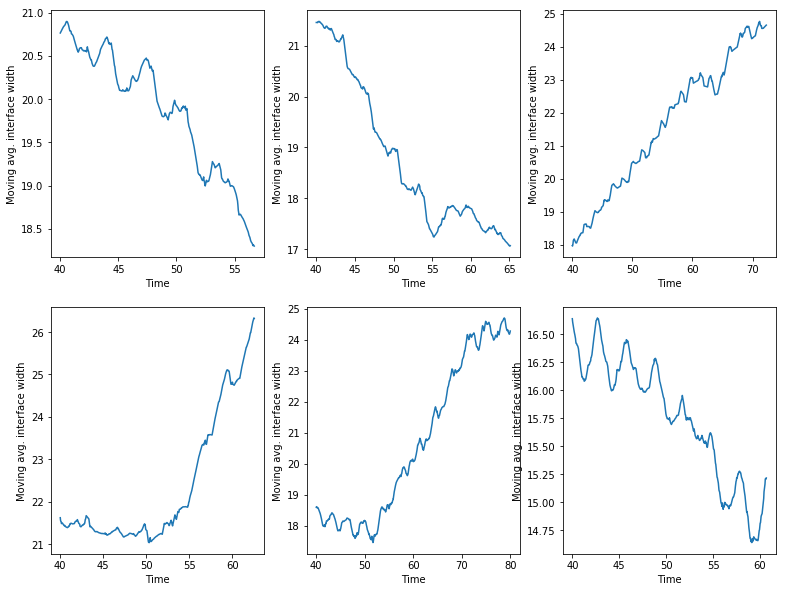

In [175]:
f, axes = plt.subplots(2, 3, figsize=(13,10))
axeslist = axes.flatten()

for i,e in enumerate(videos):
    dictionary= {}
    data = np.loadtxt('C:/Users/balin/Docs/boSchlieren/data0509/2/%s' %e)
    dictionary['interfacePosRaw'] = data[:,0]
    dictionary['interfaceWidthRaw'] = data[:,1]
    transient = int(20*framerate)
    dictionary['interfacePos'] = (data[:,0][transient:]).std()
    dictionary['interfaceWidth'] = (data[:,1][transient:]).mean()
    N = int(transient)
    ax = axeslist[i]
    amplW = np.convolve(data[:,1][transient:], np.ones((N,))/N, mode='valid')
    time = 40+np.arange(0., len(amplW), 1)/framerate
    ax.plot(time, amplW)
    ax.set_xlabel('Time')
    ax.set_ylabel('Moving avg. interface width')
    dictionary['InterfaceWidthError'] = np.max(amplW) - np.min(amplW)
    Fixvoltage[e]['interface']  = dictionary


Text(0.5,0,'Frequency [Hz]')

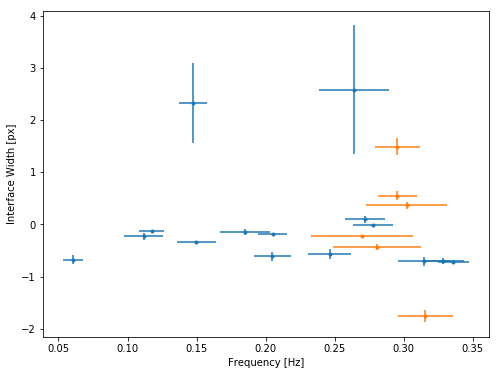

In [187]:
iw1 = []
iw2 = []
erriw1 = []
erriw2 = []

for e in FixvoltageOld.values():
    iw1.append(e['interface']['interfaceWidth'])
    erriw1.append(e['interface']['InterfaceWidthError'])
for e in Fixvoltage.values():
    iw2.append(e['interface']['interfaceWidth'])
    erriw2.append(e['interface']['InterfaceWidthError'])

iw1 = np.array(iw1)
iw2 = np.array(iw2)
erriw1 = np.array(erriw1)
erriw2 = np.array(erriw2)
relerr1 = erriw1*0.5 / iw1
relerr2 = erriw2*0.5 / iw2
err1 = np.array(err1)
err2 = np.array(err2)

plt.figure(figsize=(8, 6))
plt.errorbar(freqs1, normalize(iw1), fmt = '.', xerr = err1, yerr=relerr1*normalize(iw1), label='04.19')
plt.errorbar(freqs2, normalize(iw2), fmt = '.', xerr = err2, yerr=relerr2*normalize(iw2), label='05.09')
plt.ylabel('Interface Width [px]')
plt.xlabel('Frequency [Hz]')

In [ ]:
s